In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
citydata = "citydata.csv"
ridedata = "ridedata.csv"

# Read the City and Ride Data
citydata_pd = pd.read_csv(citydata)
ridedata_pd = pd.read_csv(ridedata)
# Combine the data into a single dataset
combineddata = pd.merge(ridedata_pd, citydata_pd, how= 'left', on="city")

# Display the data table for preview
combineddata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

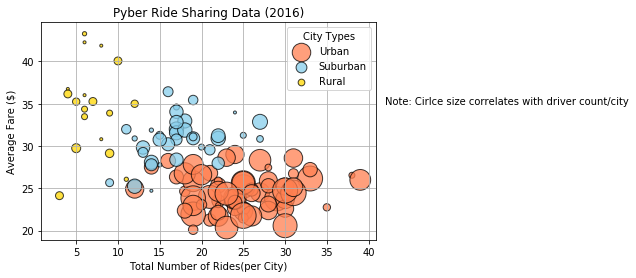

In [5]:
# Obtain the x and y coordinates for each of the three city types
urbandata = combineddata.loc[combineddata["type"] == "Urban"]
subdata = combineddata.loc[combineddata["type"] == "Suburban"]
ruraldata = combineddata.loc[combineddata["type"] == "Rural"]

urbandf = pd.DataFrame({"Fare":urbandata.groupby("city")["fare"].sum(),
                        "Fare_avg":urbandata.groupby("city")["fare"].mean(),
                      "Ride_count":urbandata.groupby("city")["ride_id"].count(),
                      "Driver_count":urbandata.groupby("city")["driver_count"].mean()
                   })
subdf = pd.DataFrame({"Fare":subdata.groupby("city")["fare"].sum(),
                      "Fare_avg":subdata.groupby("city")["fare"].mean(),
                      "Ride_count":subdata.groupby("city")["ride_id"].count(),
                      "Driver_count":subdata.groupby("city")["driver_count"].mean()
                   })
ruraldf = pd.DataFrame({"Fare":ruraldata.groupby("city")["fare"].sum(),
                        "Fare_avg":ruraldata.groupby("city")["fare"].mean(),
                      "Ride_count":ruraldata.groupby("city")["ride_id"].count(),
                      "Driver_count":ruraldata.groupby("city")["driver_count"].mean()
                   })

# Build the scatter plots for each city types
plt.scatter(urbandf["Ride_count"], urbandf["Fare_avg"], marker="o", facecolor="coral", edgecolors="black",
           s=urbandf["Driver_count"]*9, alpha=0.75, label="Urban")
plt.scatter(subdf["Ride_count"], subdf["Fare_avg"], marker="o", facecolor="skyblue", edgecolors="black",
           s=subdf["Driver_count"]*9, alpha=0.75, label="Suburban")
plt.scatter(ruraldf["Ride_count"], ruraldf["Fare_avg"], marker="o", facecolor="gold", edgecolors="black",
           s=ruraldf["Driver_count"]*9, alpha=0.75, label="Rural")

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title="City Types", loc='best') 
plt.text(42, 35, "Note: Cirlce size correlates with driver count/city")
plt.grid(True)
# Save Figure
plt.savefig('pyberscatterplot.png')

In [15]:
#subdf.head()


,Fare,Fare_avg,Ride_count,Driver_count
city,,,,
Barronchester,582.76,36.422500,16,11
Bethanyland,593.21,32.956111,18,22
Brandonfort,673.31,35.437368,19,10
Colemanland,679.68,30.894545,22,23
Davidfurt,543.93,31.995882,17,23


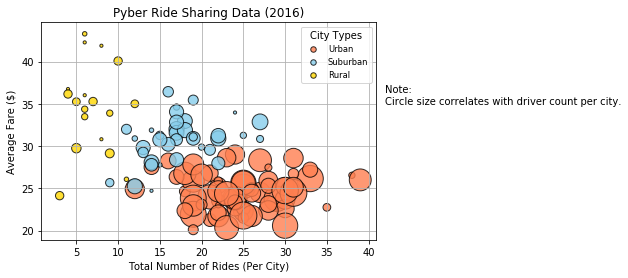

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

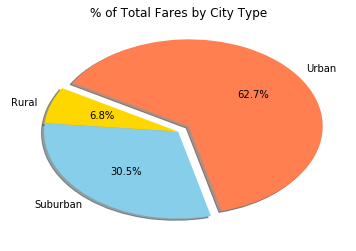

In [6]:
# Calculate Type Percents
fares_type = combineddata.groupby("type")["fare"].sum()
faresdf = fares_type.reset_index()
fares = faresdf["fare"] 

#print(fares)
colors = ["Gold", "SkyBlue", "coral"]
explode = (0,0,0.1)
city_type = ["Rural", "Suburban", "Urban"]
# Build Pie Chart
plt.pie(fares, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# Create axes which are equal so we have a perfect circle
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('pyberfarepie.png')

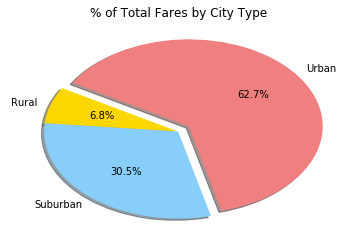

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

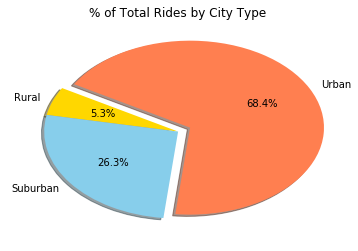

In [7]:
# Calculate Ride Percents
rides_type = combineddata.groupby("type")["ride_id"].count()
ridesdf = rides_type.reset_index()
rides = ridesdf["ride_id"]
colors = ["Gold", "SkyBlue", "coral"]
explode = (0,0,0.1)
city_type = ["Rural", "Suburban", "Urban"]
# Build Pie Chart

plt.pie(rides, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('pyberridespie.png')

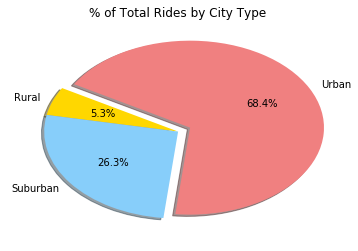

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

       type  driver_count
0     Rural            78
1  Suburban           490
2     Urban          2405


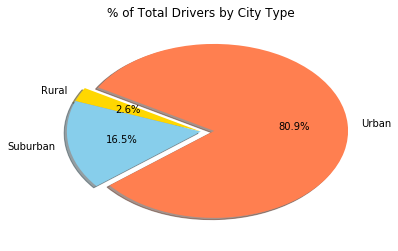

In [8]:
# Calculate Driver Percents
drivers_type = citydata_pd.groupby("type")["driver_count"].sum()
driversdf = drivers_type.reset_index()
drivers = driversdf["driver_count"]
print(driversdf)
# Build Pie Charts
colors = ["Gold", "SkyBlue", "coral"]
explode = (0,0,0.1)
city_type = ["Rural", "Suburban", "Urban"]
# Build Pie Charts

plt.pie(drivers, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')
# Save Figure
plt.savefig('pyberdriverspie.png')


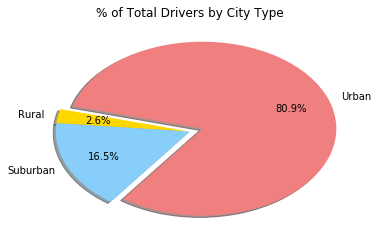

In [6]:
# Show Figure
plt.show()